# Handling Complex Images - Happy or Sad Dataset

The happy or sad dataset contains 80 images of emoji-like faces, 40 happy and 40 sad.

In [21]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

## Load and explore the data


Sample happy image:


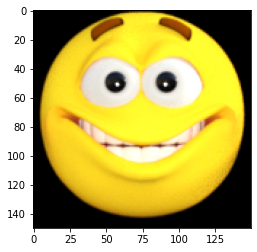


Sample sad image:


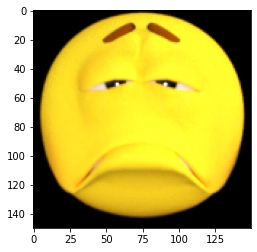

In [32]:
from tensorflow.keras.preprocessing.image import load_img

base_dir = "/content/sample_data/data"
happy_dir = os.path.join(base_dir, "happy/")
sad_dir = os.path.join(base_dir, "sad/")

print("Sample happy image:")
plt.imshow(load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[1])}"))
plt.show()

print("\nSample sad image:")
plt.imshow(load_img(f"{os.path.join(sad_dir, os.listdir(sad_dir)[1])}"))
plt.show()


In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
from tensorflow.keras.preprocessing.image import img_to_array

# Load the first example of a happy face
sample_image  = load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

print(f"The maximum pixel value used is: {np.max(sample_array)}")

Each image has shape: (150, 150, 3)
The maximum pixel value used is: 255.0


## Defining the callback


In [35]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.999:
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

## Pre-processing the data


In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def image_generator():
    train_datagen = ImageDataGenerator(rescale=1/255)
    train_generator = train_datagen.flow_from_directory(directory='/content/sample_data/data',
                                                        target_size=(150, 150),
                                                        batch_size=10,
                                                        class_mode='binary')

    return train_generator
    

In [38]:
gen = image_generator()

Found 80 images belonging to 2 classes.


## Creating and training the model



In [39]:
from tensorflow.keras import optimizers, losses

def train_happy_sad_model(train_generator):
    callbacks = myCallback()
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(learning_rate=0.001),
                  metrics=['accuracy']) 
    


    history = model.fit(x=train_generator,
                        epochs=20,
                        callbacks=[callbacks]
                       ) 
    
    return history

In [40]:
hist = train_happy_sad_model(gen)

Epoch 1/20
8/8 [==============================] - 3s 310ms/step - loss: 2.2106 - accuracy: 0.5250
Epoch 2/20
8/8 [==============================] - 3s 306ms/step - loss: 0.5722 - accuracy: 0.7000
Epoch 3/20
8/8 [==============================] - 2s 308ms/step - loss: 0.4935 - accuracy: 0.7375
Epoch 4/20
8/8 [==============================] - 2s 306ms/step - loss: 0.1951 - accuracy: 0.9625
Epoch 5/20
8/8 [==============================] - 2s 307ms/step - loss: 0.0976 - accuracy: 0.9625
Epoch 6/20
8/8 [==============================] - 2s 305ms/step - loss: 0.1954 - accuracy: 0.8875
Epoch 7/20
8/8 [==============================] - 2s 307ms/step - loss: 0.2271 - accuracy: 0.9000
Epoch 8/20
8/8 [==============================] - ETA: 0s - loss: 0.0451 - accuracy: 1.0000
Reached 99.9% accuracy so cancelling training!
8/8 [==============================] - 2s 306ms/step - loss: 0.0451 - accuracy: 1.0000


In [41]:
print(f"Your model reached the desired accuracy after {len(hist.epoch)} epochs")

Your model reached the desired accuracy after 8 epochs
